### *Импортируем библиотеки, необходимые для работы.*

**os**: это модуль для работы с операционной системой, в том числе для работы с файловой системой.

**pandas (pd)**: это библиотека для работы с данными, она предоставляет высокоуровневые структуры данных и инструменты для анализа данных.

**numpy (np)**: это библиотека для работы с массивами и матрицами. Она предоставляет высокопроизводительные структуры данных и функции для выполнения вычислительных операций.

**math**: это модуль для выполнения математических операций.

**datetime (dt)**: это модуль для работы с датами и временем.

**matplotlib.pyplot (plt)**: это библиотека для визуализации данных в виде графиков и диаграмм.

**sklearn.metrics**: это модуль библиотеки scikit-learn для оценки качества моделей машинного обучения.

**sklearn.preprocessing.MinMaxScaler**: это класс библиотеки scikit-learn для нормализации данных.

**tensorflow (tf)**: это библиотека для создания и обучения моделей машинного обучения.

**tensorflow.keras**: это модуль библиотеки TensorFlow для создания и обучения нейронных сетей.

**itertools.cycle**: это функция, возвращающая бесконечный итератор, который перебирает элементы последовательности в цикле.

**plotly.graph_objects (go)**: это библиотека для создания интерактивных графиков и диаграмм.

**plotly.express (px)**: это библиотека для создания графиков на основе высокоуровневых функций.

**plotly.subplots.make_subplots**: это функция для создания подграфиков внутри одного большого графика.

In [1]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Проверяем наличие графического процессора (GPU) в системе и выводит соответствующее сообщение в консоль. Затем внутри блока with tf.device("/GPU:0"): выполняются операции с использованием графического процессора, если он доступен. В противном случае, операции будут выполнены на центральном процессоре (CPU). 

In [3]:
import tensorflow as tf

if tf.test.is_gpu_available():
    print("GPU доступен!")
else:
    print("GPU недоступен")

with tf.device("/GPU:0"):
    pass

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU недоступен


Класс UploadingData используется для загрузки, сохранения и загрузки данных из файла для заданного тикера (symbol) с использованием библиотеки yfinance. Метод download_data() используется для загрузки данных и сохранения их в атрибут data класса. Метод save_data_to_csv() используется для сохранения данных из атрибута data в файл с указанным именем. Метод load_data() загружает данные из указанного файла в атрибут data класса.

In [4]:
import yfinance as yf
import pandas as pd

class UploadingData:
    def __init__(self, symbol):
        self.symbol = symbol
        self.data = None

    def download_data(self):
        ticker = yf.Ticker(self.symbol)
        self.data = ticker.history(period="max")
        self.data.dropna(inplace=True)
        self.data.reset_index(inplace=True)

    def save_data_to_csv(self, filename):
        self.data.to_csv(filename, index=False)
    
    def load_data(self):
        self.data = pd.read_csv(self.filepath)

In [5]:
btc_data = UploadingData("BTC-USD")
btc_data.download_data()
btc_data.save_data_to_csv("BTC-USD.csv")
df = btc_data.data

Смотрим на данные

In [6]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...,...
3154,2023-05-07 00:00:00+00:00,28901.623047,29157.517578,28441.367188,28454.978516,11301355486,0.0,0.0
3155,2023-05-08 00:00:00+00:00,28450.457031,28663.271484,27310.134766,27694.273438,19122903752,0.0,0.0
3156,2023-05-09 00:00:00+00:00,27695.068359,27821.400391,27375.601562,27658.775391,14128593256,0.0,0.0
3157,2023-05-10 00:00:00+00:00,27654.636719,28322.687500,26883.669922,27621.755859,20656025026,0.0,0.0


**df.shape** - это атрибут объекта типа DataFrame из библиотеки Pandas, который показывает размерность данных в датафрейме в виде кортежа (число строк, число столбцов).

In [7]:
df.shape

(3159, 8)

 Ознакомимся с данными и их структурой. 
 
 Метод **head()** возвращает первые n (по умолчанию 5) строк DataFrame.

 Метод **tail()** возвращает последние n (по умолчанию 5) строк DataFrame.

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


In [9]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3154,2023-05-07 00:00:00+00:00,28901.623047,29157.517578,28441.367188,28454.978516,11301355486,0.0,0.0
3155,2023-05-08 00:00:00+00:00,28450.457031,28663.271484,27310.134766,27694.273438,19122903752,0.0,0.0
3156,2023-05-09 00:00:00+00:00,27695.068359,27821.400391,27375.601562,27658.775391,14128593256,0.0,0.0
3157,2023-05-10 00:00:00+00:00,27654.636719,28322.687500,26883.669922,27621.755859,20656025026,0.0,0.0
3158,2023-05-11 00:00:00+00:00,27618.919922,27621.716797,27388.177734,27438.726562,21123600384,0.0,0.0


In [10]:
print('Общее количество дней, присутствующих в наборе данных: ',df.shape[0])
print('Общее количество колонок, присутствующих в наборе данных: ',df.shape[1])

Общее количество дней, присутствующих в наборе данных:  3159
Общее количество колонок, присутствующих в наборе данных:  8


**df.info()** - это метод Pandas DataFrame, который предоставляет сводку структуры DataFrame, в частности, общее количество записей, количество ненулевых значений в каждом столбце и тип данных в каждом столбце. В данном случае DataFrame состоит из 3157 строк и 8 столбцов, присутствует один столбец с типом datetime64[ns, UTC], шесть столбцов с типом float64 и один столбец с типом int64. Количество ненулевых значений для каждого столбца также указано.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          3159 non-null   datetime64[ns, UTC]
 1   Open          3159 non-null   float64            
 2   High          3159 non-null   float64            
 3   Low           3159 non-null   float64            
 4   Close         3159 non-null   float64            
 5   Volume        3159 non-null   int64              
 6   Dividends     3159 non-null   float64            
 7   Stock Splits  3159 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 197.6 KB


**df.describe()** - это метод Pandas, который выводит сводную статистику о числовых столбцах DataFrame.

Сводная статистика включает:

count - количество непустых (не NaN) значений

mean - среднее значение

std - стандартное отклонение

min - минимальное значение

25% - первый квартиль (25%)

50% - медиана (второй квартиль, 50%)

75% - третий квартиль (75%)

max - максимальное значение

Вывод содержит информацию о количестве значений, среднее значение, стандартное отклонение, минимальное и максимальное значения, а также значения квартилей.

In [12]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3159.000000,3159.000000,3159.000000,3159.000000,3.159000e+03,3159.0,3159.0
mean,13346.241386,13677.132752,12982.536808,13353.358790,1.661566e+10,0.0,0.0
std,16042.403813,16448.548268,15576.833134,16039.410907,1.968673e+10,0.0,0.0
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,0.0,0.0
25%,736.083496,741.967987,725.987000,736.519501,1.173785e+08,0.0,0.0
50%,7438.669922,7604.729980,7286.905273,7448.307617,9.469185e+09,0.0,0.0
75%,19318.911133,19619.129883,18987.026367,19326.874023,2.787545e+10,0.0,0.0
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.0,0.0


Класс BitcoinDataAnalyzer содержит несколько методов для анализа временных рядов курса биткоина.

Метод **test_stationarity** использует тест Дики-Фуллера для определения стационарности временного ряда. В этом методе сначала вызывается функция adfuller из модуля stattools библиотеки statsmodels для выполнения теста Дики-Фуллера. Затем выводится статистика теста, p-value и критические значения.

Метод **kpss_test** использует критерий KPSS для проверки стационарности временного ряда. Он вызывает функцию kpss из модуля stattools библиотеки statsmodels для выполнения критерия KPSS и выводит результаты теста, включая статистику, p-value и критические значения.

Метод **kendall_test** использует тест Манна-Кендалла для определения наличия тренда во временном ряду. Он вызывает функцию kendalltau из модуля mstats библиотеки scipy для выполнения теста Манна-Кендалла и выводит результаты теста, включая значение статистики и p-value.

Метод **sen_estimator** используется для оценки наклона тренда с помощью оценки Тейла-Сена. Он вызывает функцию theilslopes из модуля stats библиотеки scipy и выводит результаты теста, включая наклон.

Метод **grubbs_test** используется для проверки на наличие выбросов во временном ряде с помощью теста Граббса. Он использует формулы для расчета критического значения теста и максимального значения выброса. Если максимальное значение выброса превышает критическое значение, тест считается проваленным и выводится сообщение о том, что найден выброс.

Метод **shapiro_wilk_test** используется для проверки нормальности распределения во временном ряде с помощью теста Шапиро-Уилка. Он вызывает функцию shapiro из модуля stats библиотеки scipy и выводит результаты теста, включая статистику и p-value.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.stattools import kpss

class BitcoinDataAnalyzer:
    
    def __init__(self, df):
        self.df = df
    
    def test_stationarity(self):
        # Проверка на стационарность ряда с помощью теста Дики-Фуллера
        result = sm.tsa.stattools.adfuller(self.df['Close'])
        print('Тест Дики-Фуллера:')
        print('ADF статистика: {}'.format(result[0]))
        print('p-value: {}'.format(result[1]))
        print('Критические значения:')
        for key, value in result[4].items():
            print('\t{}: {}'.format(key, value))

    def kpss_test(self):
        # Проверка на стационарность ряда с помощью критерия KPSS
        result = kpss(df['Close'])
        print('KPSS статистика: {}'.format(result[0]))
        print('p-value: {}'.format(result[1]))
        print('Критические значения:')
        for key, value in result[3].items():
            print('\t{}: {}'.format(key, value))
    
    def kendall_test(self):
        # Проверка на наличие тренда с помощью теста Манна-Кендалла
        result = stats.mstats.kendalltau(self.df['Close'], np.arange(len(self.df)))
        print('Тест Манна-Кендалла:')
        print('Значение статистики: {}'.format(result[0]))
        print('p-value: {}'.format(result[1]))

    
    def sen_estimator(self):
        # Оценка наклона тренда с помощью оценки Тейла-Сена
        x = np.arange(len(self.df))
        slope, intercept, lo_slope, up_slope = stats.theilslopes(self.df['Close'], x, alpha=0.05)
        print('Оценка Тейла-Сена:')
        print('Наклон: {}'.format(slope))
    
    def grubbs_test(self):
        # Проверка на наличие выбросов с помощью теста Граббса
        alpha = 0.05
        n = len(self.df)
        G_crit = stats.t.ppf(1 - alpha / (2 * n), n - 2)
        G_max = np.max(np.abs((self.df['Close'] - np.mean(self.df['Close'])) / np.std(self.df['Close'])))
        if G_max > G_crit:
            print('Тест Граббса:')
            print('Найден выброс: {}'.format(G_max))
        else:
            print('Тест Граббса:')
            print('Выбросы не найдены')
    
    def shapiro_wilk_test(self):
        # Проверка на нормальность распределения с помощью теста Шапиро-Уилка
        result = stats.shapiro(self.df['Close'])
        print('Тест Шапиро-Уилка:')
        print('Статистика: {}'.format(result[0]))
        print('p-value: {}'.format(result[1]))


In [14]:
analyzer = BitcoinDataAnalyzer(df)
print('-'*70)
analyzer.test_stationarity()
print('-'*70)
analyzer.kpss_test()
print('-'*70)
analyzer.kendall_test()
print('-'*70)
analyzer.sen_estimator()
print('-'*70)
analyzer.grubbs_test()
print('-'*70)
analyzer.shapiro_wilk_test()
print('-'*70)

----------------------------------------------------------------------
Тест Дики-Фуллера:
ADF статистика: -1.5794093654621872
p-value: 0.49392805943664
Критические значения:
	1%: -3.4324416180141895
	5%: -2.862464147407348
	10%: -2.5672619455835424
----------------------------------------------------------------------
KPSS статистика: 6.030888839437759
p-value: 0.01
Критические значения:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
----------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Тест Манна-Кендалла:
Значение статистики: 0.7493791924495224
p-value: 0.0
----------------------------------------------------------------------
Оценка Тейла-Сена:
Наклон: 8.154165475309473
----------------------------------------------------------------------
Тест Граббса:
Выбросы не найдены
----------------------------------------------------------------------
Тест Шапиро-Уилка:
Статистика: 0.7842230796813965
p-value: 0.0
----------------------------------------------------------------------


Класс DataPreparation содержит методы для подготовки данных.

Метод **remove_null_values **удаляет все строки, содержащие пропущенные значения (NaN) из DataFrame.

Метод **has_null_values** возвращает значение True, если в DataFrame есть пропущенные значения, и False в противном случае.

Метод **convert_date_to_datetime** преобразует столбец с датами в формате строк в формат datetime.

Метод **select_data_for_yea**r выбирает данные только для заданного года и удаляет столбцы 'Adj Close' и 'Volume', так как они не будут использоваться в дальнейшем анализе.

In [15]:
import pandas as pd

class DataPreparation:
    def __init__(self, data):
        self.data = data
    
    def remove_null_values(self):
        self.data = self.data.dropna()
    
    def has_null_values(self):
        return self.data.isnull().values.any()
    
    def convert_date_to_datetime(self, date_col):
        self.data[date_col] = pd.to_datetime(self.data[date_col], format='%Y-%m-%d')
    
    def select_data_for_year(self, year):
        mask = (self.data['Date'] >= str(year) + '-01-01') & (self.data['Date'] <= str(year) + '-12-31')
        self.data = self.data.loc[mask].drop(['Adj Close', 'Volume'], axis=1)


In [16]:
data_preporator = DataPreparation(df)
data_preporator.remove_null_values()

print(data_preporator.has_null_values())

data_preporator.convert_date_to_datetime('Date')

False


In [17]:
data_preporator.convert_date_to_datetime('Date')

In [18]:
type(df['Date'])

pandas.core.series.Series

In [19]:
dfClose = df[['Date','Close']]
print("Размерность датафрейма, содержащего колонки Date и Close:", dfClose.shape)

Размерность датафрейма, содержащего колонки Date и Close: (3159, 2)


Класс Plotting предоставляет различные методы для визуализации данных о цене биткоина.


Метод **plot_closing_price** строит линейный график цены закрытия биткоина на основе дат и цен закрытия, содержащихся в переданном DataFrame.

Метод **plot_trading_volume_by_year** строит столбчатую диаграмму объема торговли биткоина за каждый год на основе данных в DataFrame.

Метод **plot_last_5_years_price_distribution** строит гистограмму распределения цен закрытия биткоина за последние 5 лет на основе данных в DataFrame.

Метод **plot_last_year_price_vs_trading_volume** строит точечный график зависимости цены закрытия биткоина от объема торговли за последний год на основе данных в DataFrame.

Метод **plot_last_month_price_by_day_of_week** строит столбчатую диаграмму цен закрытия биткоина по дням недели за последний месяц на основе данных в DataFrame.

Метод **box_plot** строит ящик с усами для цен закрытия биткоина на основе данных в DataFrame.

Метод **godzilla_plot** строит график свечей с линиями скользящей средней цены закрытия биткоина и определяет значимые периоды.

Метод **scatter_plot** строит точечный график цены закрытия и открытия биткоина на основе данных в DataFrame.

In [20]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

class Plotting:
    def __init__(self, df):
        self.df = df

    def plot_closing_price(self):
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=self.df['Date'], y=self.df['Close'], mode='lines', name='Close'))
        fig.update_layout(title='Bitcoin Closing Price', xaxis_title='Date', yaxis_title='Price (USD)')
        fig.show()

    def plot_trading_volume_by_year(self):
        self.df['Year'] = pd.DatetimeIndex(self.df['Date']).year
        fig = px.bar(self.df, x='Year', y='Volume', title='Bitcoin Trading Volume by Year', labels={'Volume': 'Trading Volume'})
        fig.update_layout(showlegend=False)
        fig.show()
    def plot_last_5_years_price_distribution(self):
        df = self.df.copy()
        df['Year'] = pd.DatetimeIndex(df['Date']).year
        df_last_5_years = df[df['Year'] >= 2017]

        fig = px.histogram(df_last_5_years, x='Close', nbins=50, title='Bitcoin Closing Price Distribution over the Last 5 Years')
        fig.update_layout(xaxis_title='Price (USD)', yaxis_title='Count')

        fig.show()
    
    def plot_last_year_price_vs_trading_volume(self):
        df = self.df.copy()
        df['Year'] = pd.DatetimeIndex(df['Date']).year
        df_last_year = df[df['Year'] == 2023]

        fig = px.scatter(df_last_year, x='Close', y='Volume', hover_name='Date', title='Bitcoin Closing Price vs Trading Volume (Last Year)')
        fig.update_layout(xaxis_title='Closing Price (USD)', yaxis_title='Trading Volume')

        fig.show()
        
    def plot_last_month_price_by_day_of_week(self):
        df = self.df.copy()
        df['DayOfWeek'] = pd.DatetimeIndex(df['Date']).day_name()
        df_last_month = df.tail(30)

        fig = px.bar(df_last_month, x='DayOfWeek', y='Close', title='Bitcoin Closing Price by Day of Week (Last Month)')
        fig.update_layout(yaxis_title='Closing Price(USD)')

        fig.show()

    def box_plot(self):
      fig = go.Figure()

      fig.add_trace(go.Box(y=df['Close'], boxpoints='all', jitter=0.3, pointpos=-1.8))

      fig.update_layout(title='Bitcoin Closing Price Distribution', yaxis_title='Price ($)')

      fig.show()
    
    def godzilla_plot(self):
      ma_short = df['Close'].rolling(window=50).mean()
      ma_long = df['Close'].rolling(window=200).mean()

      # Создание графика свечей
      fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                      open=df['Open'],
                      high=df['High'],
                      low=df['Low'],
                      close=df['Close'])])

      # Добавление линий скользящей средней
      fig.add_trace(go.Scatter(x=df['Date'], y=ma_short, name='MA(50)', line=dict(color='orange')))
      fig.add_trace(go.Scatter(x=df['Date'], y=ma_long, name='MA(200)', line=dict(color='purple')))

      # Определение значимых периодов
      significant_periods = [
          dict(x0='2011-06-01', x1='2013-12-01', y0=0, y1=3000, fillcolor='gray', opacity=0.3, layer='below'),
          dict(x0='2017-01-01', x1='2018-01-01', y0=0, y1=20000, fillcolor='gray', opacity=0.3, layer='below')
      ]

      for period in significant_periods:
          fig.add_shape(type="rect", x0=period['x0'], y0=period['y0'], x1=period['x1'], y1=period['y1'],
                        line=dict(width=0), fillcolor=period['fillcolor'], opacity=period['opacity'], layer=period['layer'])

      fig.update_layout(title='Bitcoin Price', xaxis_title='Date', yaxis_title='Price ($)', 
                        shapes=significant_periods, showlegend=True, legend=dict(x=0, y=1))

      fig.show()
    
    def scatter_plot(self):
      fig = go.Figure()

      fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='markers', name='Close'))
      fig.add_trace(go.Scatter(x=df['Date'], y=df['Open'], mode='markers', name='Open'))

      fig.update_layout(title='Bitcoin Price Scatter Plot', xaxis_title='Date', yaxis_title='Price ($)')

      fig.show()




In [21]:
plot = Plotting(df)
plot.plot_closing_price()

In [22]:
plot.plot_trading_volume_by_year()

In [23]:
plot.plot_last_5_years_price_distribution()

In [24]:
plot.plot_last_year_price_vs_trading_volume()

In [25]:
plot.plot_last_month_price_by_day_of_week()

In [26]:
plot.box_plot()

In [27]:
plot.godzilla_plot()

In [28]:
plot.scatter_plot()

In [29]:
del dfClose['Date']
scaler=MinMaxScaler(feature_range=(0,1))
dfClose =scaler.fit_transform(np.array(dfClose).reshape(-1,1))
print(dfClose.shape)

(3159, 1)


In [30]:
training_size=int(len(dfClose)*0.9)
test_size=len(dfClose)-training_size
train_data,test_data=dfClose[0:training_size,:],dfClose[training_size:len(dfClose),:1]
print("Размерность тренировочных данных: ", train_data.shape)
print("Размерность тестовых данных: ", test_data.shape)

Размерность тренировочных данных:  (2843, 1)
Размерность тестовых данных:  (316, 1)


In [31]:
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        X.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

In [32]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("Размер X_train: ", X_train.shape)
print("Размер y_train: ", y_train.shape)
print("Размер X_test: ", X_test.shape)
print("Размер y_test", y_test.shape)

Размер X_train:  (2827, 15)
Размер y_train:  (2827,)
Размер X_test:  (300, 15)
Размер y_test (300,)


In [33]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("Размер X_train: ", X_train.shape)
print("Размер X_test: ", X_test.shape)

Размер X_train:  (2827, 15, 1)
Размер X_test:  (300, 15, 1)


класс LSTModel . Этот класс содержит методы инициализации модели, обучения модели на данных, предсказания на новых данных и построения графика потерь (loss) для тренировочного и валидационного наборов данных. В методе инициализации модели определяются архитектура модели, функция потерь и метод оптимизации. Метод fit используется для обучения модели на входных данных X и соответствующих метках y с возможностью указать валидационный набор данных, количество эпох, размер батча и уровень подробности вывода. Метод predict позволяет использовать обученную модель для предсказания на новых данных. Метод plot_loss строит график потерь для тренировочных и валидационных данных.

In [34]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from keras.models import save_model


class LSTModel:
    def __init__(self):
        self.model = Sequential()
        self.model.add(LSTM(15,input_shape=(None,1),activation="relu"))
        self.model.add(Dense(1))
        self.model.compile(loss="mean_squared_error",optimizer="adam")
    
    def fit(self, X, y, validation_data=None, epochs=50, batch_size=64, verbose=1):
        self.history = self.model.fit(X, y, validation_data=validation_data, epochs=epochs, batch_size=batch_size, verbose=verbose)
    
    def predict(self, X):
        return self.model.predict(X)
    
    def plot_loss(self):
        loss = self.history.history['loss']
        val_loss = self.history.history['val_loss']
        epochs = range(len(loss))
        plt.plot(epochs, loss, 'r', label='Тренировочный лосс')
        if val_loss:
            plt.plot(epochs, val_loss, 'b', label='Валидационный лосс')
        plt.title('Тренировочный и валидационный лосс')
        plt.legend(loc=0)
        plt.show()

Epoch 1/50
45/45 [==============================] - 3s 14ms/step - loss: 0.0357 - val_loss: 0.0089
Epoch 2/50
45/45 [==============================] - 0s 10ms/step - loss: 0.0088 - val_loss: 0.0025
Epoch 3/50
45/45 [==============================] - 0s 9ms/step - loss: 0.0029 - val_loss: 0.0054
Epoch 4/50
45/45 [==============================] - 0s 9ms/step - loss: 0.0024 - val_loss: 0.0049
Epoch 5/50
45/45 [==============================] - 0s 8ms/step - loss: 0.0021 - val_loss: 0.0035
Epoch 6/50
45/45 [==============================] - 0s 9ms/step - loss: 0.0018 - val_loss: 0.0039
Epoch 7/50
45/45 [==============================] - 0s 9ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 8/50
45/45 [==============================] - 0s 9ms/step - loss: 7.5421e-04 - val_loss: 3.2502e-04
Epoch 9/50
45/45 [==============================] - 0s 9ms/step - loss: 4.6036e-04 - val_loss: 2.9265e-04
Epoch 10/50
45/45 [==============================] - 0s 9ms/step - loss: 4.7005e-04 - val_loss: 2.73

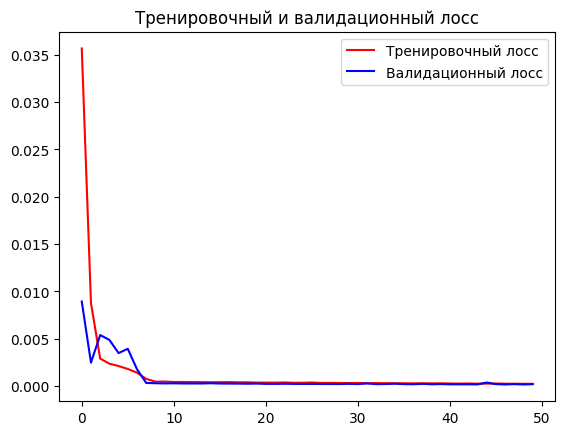

In [35]:
model = LSTModel()
model.fit(X_train, y_train, validation_data=(X_test, y_test))
model.plot_loss()

In [36]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

10/10 [==============================] - 0s 4ms/step


((2827, 1), (300, 1))

Обратное преобразование предсказанных значений, полученных после масштабирования данных (нормализации) при использовании Scikit-learn MinMaxScaler.

**scaler.inverse_transform(train_predict)** преобразует предсказанные значения обучающей выборки из нормализованной формы обратно в исходную форму. То есть, предсказанные значения возвращаются в исходный масштаб данных.

**scaler.inverse_transform(test_predict)** преобразует предсказанные значения тестовой выборки из нормализованной формы обратно в исходную форму.

**scaler.inverse_transform(y_train.reshape(-1,1))**  и **scaler.inverse_transform(y_test.reshape(-1,1))**преобразуют исходные значения обучающей и тестовой выборок соответственно из нормализованной формы обратно в их исходную форму.

In [37]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

**MAE (Mean Absolute Error)** - средняя абсолютная ошибка - это среднее значение абсолютных различий между прогнозируемыми значениями и реальными значениями. Чем меньше MAE, тем лучше модель.

**RMSE (Root Mean Squared Error)** - корень из среднеквадратичной ошибки - это среднеквадратическое отклонение прогнозируемых значений от реальных значений. RMSE также используется для измерения точности прогноза. Чем меньше RMSE, тем лучше модель.

In [38]:
print("-"*70)
print("Метрика MAE на тренировочных данных: ", mean_absolute_error(original_ytrain,train_predict))
print("Метрика RMSE на тренировочных данных: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("-"*70)
print("Метрика MAE на тестовых данных: ", mean_absolute_error(original_ytest,test_predict))
print("Метрика RMSE на тестовых данных: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("-"*70)

----------------------------------------------------------------------
Метрика MAE на тренировочных данных:  569.0913617809122
Метрика RMSE на тренировочных данных:  1049.608248322004
----------------------------------------------------------------------
Метрика MAE на тестовых данных:  729.69244140625
Метрика RMSE на тестовых данных:  932.5215892416774
----------------------------------------------------------------------


10/10 [==============================] - 0s 3ms/step


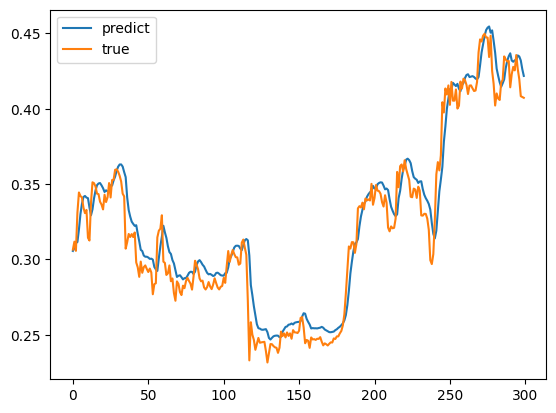

In [39]:
yhat = model.predict(X_test)
plt.plot(yhat, label='predict')
plt.plot(y_test, label='true')
plt.legend()
plt.show()

Класс Prediction используется для предсказания цен на акции на несколько дней вперед с помощью обученной модели и для визуализации прогнозов вместе с историческими данными.

Метод predict_prices получает последние time_step дней исторических цен акций, строит прогноз на следующий день и добавляет его в список lst_output. Потом на основе этого прогноза делает прогноз на следующий день и так далее до тех пор, пока не будет достигнут желаемый pred_days прогноз.

Метод get_predicted_prices возвращает массив прогнозируемых цен.

Метод plot_predictions использует matplotlib для построения графика, который показывает исторические цены на акции и прогнозируемые цены на несколько дней вперед.

In [40]:
import matplotlib.pyplot as plt
import numpy as np

class Prediction:
    def __init__(self, test_data, model, scaler):
        self.test_data = test_data
        self.model = model
        self.scaler = scaler
        self.predicted_prices = None
        
    def predict_prices(self, time_step, pred_days):
        x_input = self.test_data[len(self.test_data)-time_step:].reshape(1,-1)
        temp_input = list(x_input)
        temp_input = temp_input[0].tolist()

        lst_output = []
        n_steps = time_step
        i = 0

        while i < pred_days:
            if len(temp_input) > time_step:
                x_input = np.array(temp_input[1:])
                print("{} day input {}".format(i, x_input))
                x_input = x_input.reshape((1, n_steps, 1))

                yhat = self.model.predict(x_input)
                print("{} day output {}".format(i, yhat))
                temp_input.extend(yhat[0].tolist())
                temp_input = temp_input[1:]

                lst_output.extend(yhat.tolist())
                i = i + 1

            else:
                x_input = x_input.reshape((1, n_steps, 1))
                yhat = self.model.predict(x_input)
                temp_input.extend(yhat[0].tolist())

                lst_output.extend(yhat.tolist())
                i = i + 1

        print("Выходные данные прогнозируемых следующих дней: ", len(lst_output))

        pred_prices = self.scaler.inverse_transform(lst_output)
        print("Прогнозируемые цены на следующие {} дней:".format(pred_days))
        print(pred_prices)
        self.predicted_prices = pred_prices
        
    def get_predicted_prices(self):
        return self.predicted_prices
        
    def plot_predictions(self):
        pred_days = len(self.predicted_prices)
        actual_days = len(self.test_data)

        plt.plot(range(actual_days), self.test_data, label="Исторические цены")
        plt.plot(range(actual_days, actual_days+pred_days), self.predicted_prices, color='red', label="Прогнозируемые цены")
        plt.title("Прогнозируемые цены")
        plt.xlabel("Дни")
        plt.ylabel("Цена")
        plt.legend()
        plt.show()

In [41]:
prediction = Prediction(test_data, model, scaler)
pred_price = prediction.predict_prices(time_step=7, pred_days=7)

1/1 [==============================] - 0s 174ms/step
1 day input [0.42628081 0.41960841 0.40832009 0.40779333 0.40724398 0.40452796
 0.343759  ]
1/1 [==============================] - 0s 26ms/step
1 day output [[0.32482597]]
2 day input [0.41960841 0.40832009 0.40779333 0.40724398 0.40452796 0.343759
 0.32482597]
1/1 [==============================] - 0s 21ms/step
2 day output [[0.30581012]]
3 day input [0.40832009 0.40779333 0.40724398 0.40452796 0.343759   0.32482597
 0.30581012]
1/1 [==============================] - 0s 26ms/step
3 day output [[0.28732875]]
4 day input [0.40779333 0.40724398 0.40452796 0.343759   0.32482597 0.30581012
 0.28732875]
1/1 [==============================] - 0s 27ms/step
4 day output [[0.27012736]]
5 day input [0.40724398 0.40452796 0.343759   0.32482597 0.30581012 0.28732875
 0.27012736]
1/1 [==============================] - 0s 23ms/step
5 day output [[0.2536651]]
6 day input [0.40452796 0.343759   0.32482597 0.30581012 0.28732875 0.27012736
 0.25366509

Сохраним модель

In [42]:
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
model.save('model.h5')